In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import log_loss

In [2]:
'''
    1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy
    (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция.
    Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер,
    форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с 
    параметрами test_size = 0.8 и random_state = 241.
'''

df = pd.read_csv('gbm-data.csv')

X = np.array(df.loc[:,'D1':])
y = np.array(df['Activity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190            1.62m
         2           0.9246            1.55m
         3           0.8489            1.50m
         4           0.7720            1.40m
         5           0.7203            1.35m
         6           0.6653            1.38m
         7           0.6312            1.34m
         8           0.5891            1.38m
         9           0.5548            1.35m
        10           0.5377            1.30m
        20           0.2920            1.16m
        30           0.1421            1.11m
        40           0.0887            1.02m
        50           0.0552           57.78s
        60           0.0388           54.06s
        70           0.0276           50.46s
        80           0.0183           47.86s
        90           0.0120           44.71s
       100           0.0076           41.92s
       200           0.0004           12.25s
      Iter       Train Loss   Remaining Time 
        

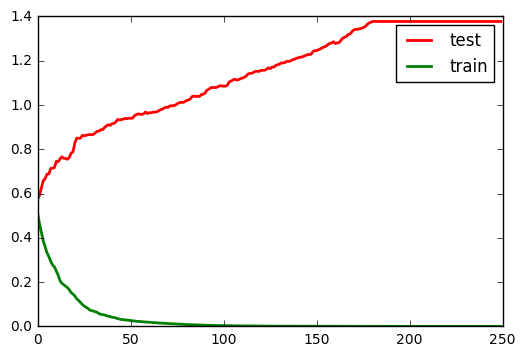

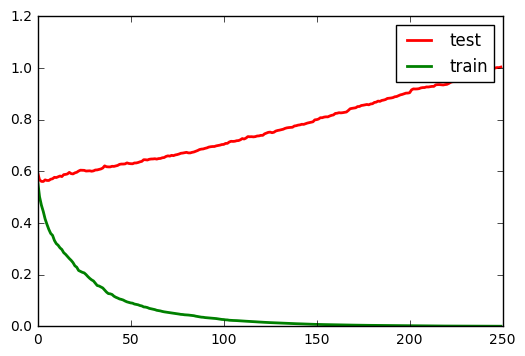

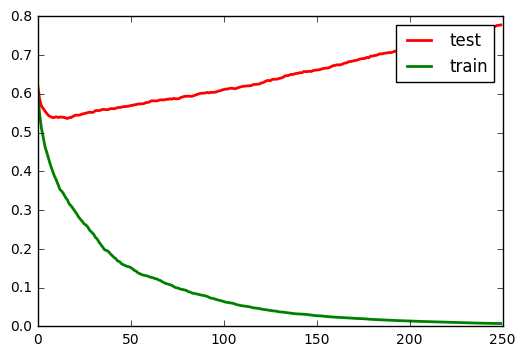

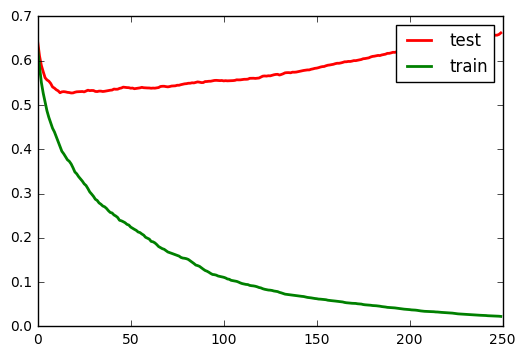

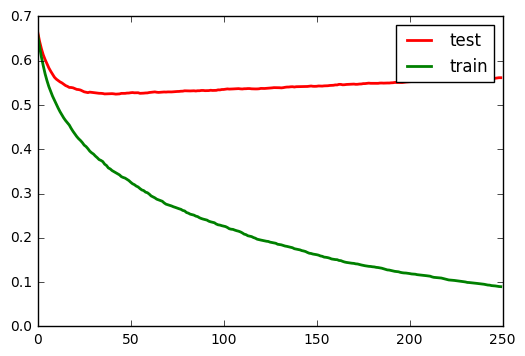

In [29]:
'''
    2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241
    и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
'''


def transform(y_pred):
    '''
    Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    где y_pred — предсказанное значение.
    '''
    
    return 1.0 / (1.0 + np.exp(-y_pred))
    
    
def log_ross_score(model, X, y):
    '''
    Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой 
    выборке на каждой итерации.
    '''
    
    score = []
    for pred in model.staged_decision_function(X):
        score.append(log_loss(y,[transform(y_pred) for y_pred in pred]))
    
    return score

def plot_graph(koef, test_loss, train_loss):
    '''
    Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции 
    sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное 
    значение метрики и номер итерации, на которой оно достигается.    
    '''

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('kef= '+str(koef)+'.png')
    
    min_metrics_value = min(test_loss)
    min_metrics_index = test_loss.index(min_metrics_value)
    return min_metrics_index, min_metrics_value
    
def predict_model(koef):
    model = GradientBoostingClassifier(learning_rate=koef, n_estimators=250, verbose=True, random_state=24)
    model.fit(X_train, y_train)
    
    test_loss = log_ross_score(model, X_test, y_test)
    train_loss = log_ross_score(model, X_train, y_train)
    return plot_graph(koef, test_loss, train_loss)


result = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    result[learning_rate] = predict_model(learning_rate)

In [5]:
'''
    3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: 
    переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов 
    overfitting либо underfitting.
'''

print('overfitting')

overfitting


In [31]:
'''
    4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно 
    достигается, при learning_rate = 0.2.
'''

print(round(result[0.2][1],2), result[0.2][0])

0.53 18


In [36]:
'''
    5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству
    итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего 
    пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на
    тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с 
    помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)
'''

clf = RandomForestClassifier(n_estimators=result[0.2][0] ,random_state=241)
clf.fit(X_train, y_train)
y_predict = clf.predict_proba(X_test)[:,1]

print(round(log_loss(y_test,y_predict),2))

0.6
